<a href="https://colab.research.google.com/github/mominul58/My-Codes/blob/main/EDGE-Project-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: "Student Grading and Performance Analysis System"**

**Objective**

Develop a Python application to manage student records, calculate grades, and analyze class performance using Python concepts such as data structures, file handling, NumPy, and Pandas.

# 1 Data Initialization

● Create a CSV file to store initial student data:
* Fields: Student ID, Name, Subjects (e.g., Math, English,Science), Marks, Grade.
* Use Pandas to load and process the data.

In [23]:
import csv

# Data for 10 students
students_data = [
    {"Student ID": "S001", "Name": "Amin Laskor", "Subjects (Science)": "Physics", "Marks": 85, "Grade": "A"},
    {"Student ID": "S002", "Name": "Rasel Kibria", "Subjects (Science)": "Chemistry", "Marks": 78, "Grade": "B"},
    {"Student ID": "S003", "Name": "Kabir sumo", "Subjects (Science)": "Biology", "Marks": 92, "Grade": "A+"},
    {"Student ID": "S004", "Name": "Mosarraf Hossen", "Subjects (Science)": "Physics", "Marks": 74, "Grade": "B"},
    {"Student ID": "S005", "Name": "Abid Ali", "Subjects (Science)": "Chemistry", "Marks": 88, "Grade": "A"},
    {"Student ID": "S006", "Name": "Sakil Mia", "Subjects (Science)": "Biology", "Marks": 67, "Grade": "C"},
    {"Student ID": "S007", "Name": "Pranto Bhowmik", "Subjects (Science)": "Physics", "Marks": 80, "Grade": "B+"},
    {"Student ID": "S008", "Name": "Hannan Mia", "Subjects (Science)": "Chemistry", "Marks": 95, "Grade": "A+"},
    {"Student ID": "S009", "Name": "Ishita Jahan", "Subjects (Science)": "Biology", "Marks": 73, "Grade": "B"},
    {"Student ID": "S010", "Name": "Jarin Khandaker", "Subjects (Science)": "Physics", "Marks": 90, "Grade": "A+"},
]

# File name for the CSV
filename = "student_data.csv"

# Writing data to CSV
with open(filename, mode='w', newline='') as file:
    # Define the field names
    fieldnames = ["Student ID", "Name", "Subjects (Science)", "Marks", "Grade"]

    # Create a writer object
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write the student data
    writer.writerows(students_data)

print(f"CSV file '{filename}' has been created successfully!")


CSV file 'student_data.csv' has been created successfully!


In [25]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('student_data.csv')

# Display the first few rows of the DataFrame
print("Loaded Data:")
print(df.head())  # Show first 5 rows

# Example 1: Calculate average marks
average_marks = df['Marks'].mean()
print(f"\nAverage Marks: {average_marks:.2f}")

# Example 2: Get the number of students in each grade
grade_counts = df['Grade'].value_counts()
print("\nGrade Distribution:")
print(grade_counts)



Loaded Data:
  Student ID             Name Subjects (Science)  Marks Grade
0       S001      Amin Laskor            Physics     85     A
1       S002     Rasel Kibria          Chemistry     78     B
2       S003       Kabir sumo            Biology     92    A+
3       S004  Mosarraf Hossen            Physics     74     B
4       S005         Abid Ali          Chemistry     88     A

Average Marks: 82.20

Grade Distribution:
Grade
B     3
A+    3
A     2
C     1
B+    1
Name: count, dtype: int64


#2 Student Record Management
● Allow adding, updating, and deleting student records:
* Add new students with marks for each subject.
* Update marks or details of existing students.
* Remove a student record by their ID.

In [33]:
import pandas as pd

# Load the existing student data from CSV
def load_data():
    return pd.read_csv('student_data.csv')

# Save the DataFrame to CSV
def save_data(df):
    df.to_csv('student_data.csv', index=False)

# Add a new student record
def add_student(df, student_id, name, subject, marks, grade):
    new_student = {"Student ID": student_id, "Name": name, "Subjects (Science)": subject, "Marks": marks, "Grade": grade}
    # Use pd.concat to add a new row
    df = pd.concat([df, pd.DataFrame([new_student])], ignore_index=True)
    save_data(df)
    print(f"Student {name} added successfully.")
    return df

# Update an existing student record
def update_student(df, student_id, name=None, subject=None, marks=None, grade=None):
    student = df[df['Student ID'] == student_id]

    if not student.empty:
        if name:
            df.loc[df['Student ID'] == student_id, 'Name'] = name
        if subject:
            df.loc[df['Student ID'] == student_id, 'Subjects (Science)'] = subject
        if marks is not None:
            df.loc[df['Student ID'] == student_id, 'Marks'] = marks
        if grade:
            df.loc[df['Student ID'] == student_id, 'Grade'] = grade

        save_data(df)
        print(f"Student {student_id} updated successfully.")
    else:
        print(f"Student with ID {student_id} not found.")

    return df

# Delete a student record by ID
def delete_student(df, student_id):
    student = df[df['Student ID'] == student_id]

    if not student.empty:
        df = df[df['Student ID'] != student_id]
        save_data(df)
        print(f"Student {student_id} deleted successfully.")
    else:
        print(f"Student with ID {student_id} not found.")

    return df

# Display student records
def display_students(df):
    print("\nStudent Records:")
    print(df)

# Main function to interact with the user
def main():
    df = load_data()

    while True:
        print("\nStudent Record Management")
        print("1. Add new student")
        print("2. Update student details")
        print("3. Delete student")
        print("4. Display all student records")
        print("5. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            student_id = input("Enter Student ID: ")
            name = input("Enter Student Name: ")
            subject = input("Enter Subject: ")
            marks = int(input("Enter Marks: "))
            grade = input("Enter Grade: ")
            df = add_student(df, student_id, name, subject, marks, grade)

        elif choice == '2':
            student_id = input("Enter Student ID to update: ")
            name = input("Enter New Name (leave empty to keep current): ")
            subject = input("Enter New Subject (leave empty to keep current): ")
            marks = input("Enter New Marks (leave empty to keep current): ")
            marks = int(marks) if marks else None
            grade = input("Enter New Grade (leave empty to keep current): ")
            df = update_student(df, student_id, name or None, subject or None, marks, grade or None)

        elif choice == '3':
            student_id = input("Enter Student ID to delete: ")
            df = delete_student(df, student_id)

        elif choice == '4':
            display_students(df)

        elif choice == '5':
            print("Exiting Student Record Management.")
            break

        else:
            print("Invalid choice, please try again.")

if __name__ == '__main__':
    main()



Student Record Management
1. Add new student
2. Update student details
3. Delete student
4. Display all student records
5. Exit
Enter your choice: 1
Enter Student ID: S011
Enter Student Name: Anower Hossen
Enter Subject: Biology
Enter Marks: 79
Enter Grade: B
Student Anower Hossen added successfully.

Student Record Management
1. Add new student
2. Update student details
3. Delete student
4. Display all student records
5. Exit
Enter your choice: 5
Exiting Student Record Management.


#3 Grade Calculation
● Use Conditional Statements to calculate grades based on marks:
* ○ Example:
■ 90-100: A
■ 80-89: B
■ 70-79: C
■ <70: F

● Assign grades for all students and update the dataset.

In [34]:
import pandas as pd

# Load the existing student data from CSV
def load_data():
    return pd.read_csv('student_data.csv')

# Save the DataFrame to CSV
def save_data(df):
    df.to_csv('student_data.csv', index=False)

# Assign grades based on marks
def assign_grades(df):
    # Define a function to assign grades based on marks
    def calculate_grade(marks):
        if marks >= 90:
            return 'A'
        elif marks >= 80:
            return 'B'
        elif marks >= 70:
            return 'C'
        else:
            return 'F'

    # Apply the function to the 'Marks' column to create a new 'Grade' column
    df['Grade'] = df['Marks'].apply(calculate_grade)
    save_data(df)
    print("Grades assigned successfully to all students.")
    return df

# Display student records
def display_students(df):
    print("\nStudent Records:")
    print(df)

# Main function to interact with the user
def main():
    df = load_data()

    # Assign grades to all students
    df = assign_grades(df)

    # Display updated student records
    display_students(df)

if __name__ == '__main__':
    main()


Grades assigned successfully to all students.

Student Records:
   Student ID             Name Subjects (Science)  Marks Grade
0        S001      Amin Laskor            Physics     85     B
1        S002     Rasel Kibria          Chemistry     78     C
2        S003       Kabir sumo            Biology     92     A
3        S005         Abid Ali          Chemistry     91     A
4        S006        Sakil Mia            Biology     67     F
5        S007   Pranto Bhowmik            Physics     80     B
6        S008       Hannan Mia          Chemistry     95     A
7        S009     Ishita Jahan            Biology     73     C
8        S010  Jarin Khandaker            Physics     90     A
9        S011            Kelly            Biology     88     B
10       S011    Anower Hossen            Biology     79     C


#4 Class Performance Analysis
● Perform data analysis using NumPy and Pandas:
* Calculate the average marks for each subject.
* Identify the top scorer and lowest scorer in each subject.
* Determine the pass percentage of the class.

In [35]:
import pandas as pd
import numpy as np

# Load the existing student data from CSV
def load_data():
    return pd.read_csv('student_data.csv')

# Save the DataFrame to CSV
def save_data(df):
    df.to_csv('student_data.csv', index=False)

# Class Performance Analysis
def class_performance_analysis(df):
    # 1. Calculate average marks for each subject
    average_marks = df.groupby('Subjects (Science)')['Marks'].mean()
    print("\nAverage Marks for Each Subject:")
    print(average_marks)

    # 2. Identify the top scorer and lowest scorer in each subject
    top_scorer = df.loc[df.groupby('Subjects (Science)')['Marks'].idxmax()]
    lowest_scorer = df.loc[df.groupby('Subjects (Science)')['Marks'].idxmin()]

    print("\nTop Scorer in Each Subject:")
    print(top_scorer[['Subjects (Science)', 'Name', 'Marks']])

    print("\nLowest Scorer in Each Subject:")
    print(lowest_scorer[['Subjects (Science)', 'Name', 'Marks']])

    # 3. Calculate the pass percentage (marks >= 50 is considered a pass)
    total_students = len(df)
    passed_students = len(df[df['Marks'] >= 50])
    pass_percentage = (passed_students / total_students) * 100

    print(f"\nPass Percentage of the Class: {pass_percentage:.2f}%")

# Main function to interact with the user
def main():
    df = load_data()

    # Perform the class performance analysis
    class_performance_analysis(df)

if __name__ == '__main__':
    main()



Average Marks for Each Subject:
Subjects (Science)
Biology      79.8
Chemistry    88.0
Physics      85.0
Name: Marks, dtype: float64

Top Scorer in Each Subject:
  Subjects (Science)             Name  Marks
2            Biology       Kabir sumo     92
6          Chemistry       Hannan Mia     95
8            Physics  Jarin Khandaker     90

Lowest Scorer in Each Subject:
  Subjects (Science)            Name  Marks
4            Biology       Sakil Mia     67
1          Chemistry    Rasel Kibria     78
5            Physics  Pranto Bhowmik     80

Pass Percentage of the Class: 100.00%


#5 Visualizing Data
● Use Matplotlib or Pandas Visualization to:

* Plot a bar chart of average marks per subject.
* Display a pie chart showing the grade distribution in the class.
* Create a line graph of student marks in a chosen subject.


Data Visualization
1. Bar Chart of Average Marks per Subject
2. Pie Chart of Grade Distribution
3. Line Graph of Student Marks in a Chosen Subject
4. Exit
Enter your choice: 1


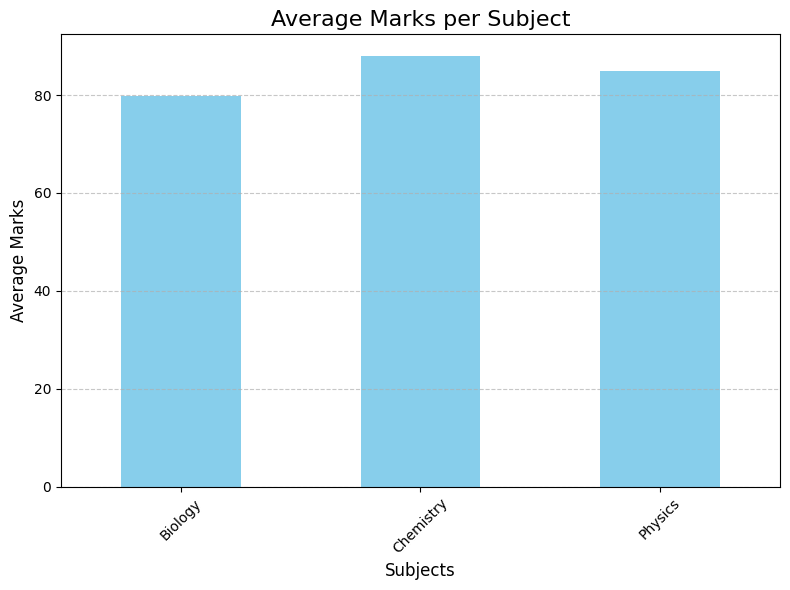


Data Visualization
1. Bar Chart of Average Marks per Subject
2. Pie Chart of Grade Distribution
3. Line Graph of Student Marks in a Chosen Subject
4. Exit
Enter your choice: 2


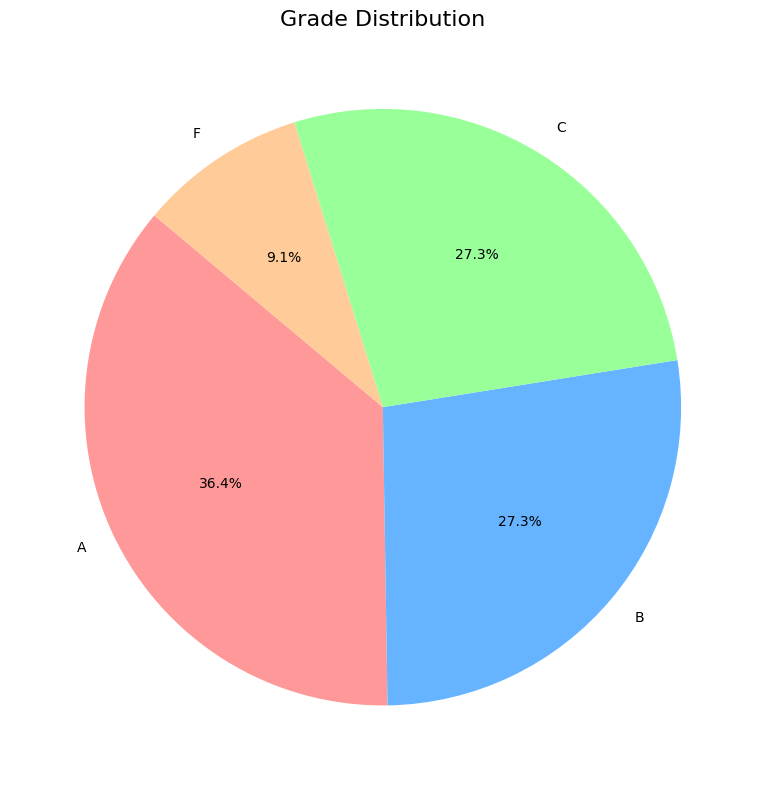


Data Visualization
1. Bar Chart of Average Marks per Subject
2. Pie Chart of Grade Distribution
3. Line Graph of Student Marks in a Chosen Subject
4. Exit
Enter your choice: 3
Enter the subject (e.g., Physics, Chemistry, Biology): Biology


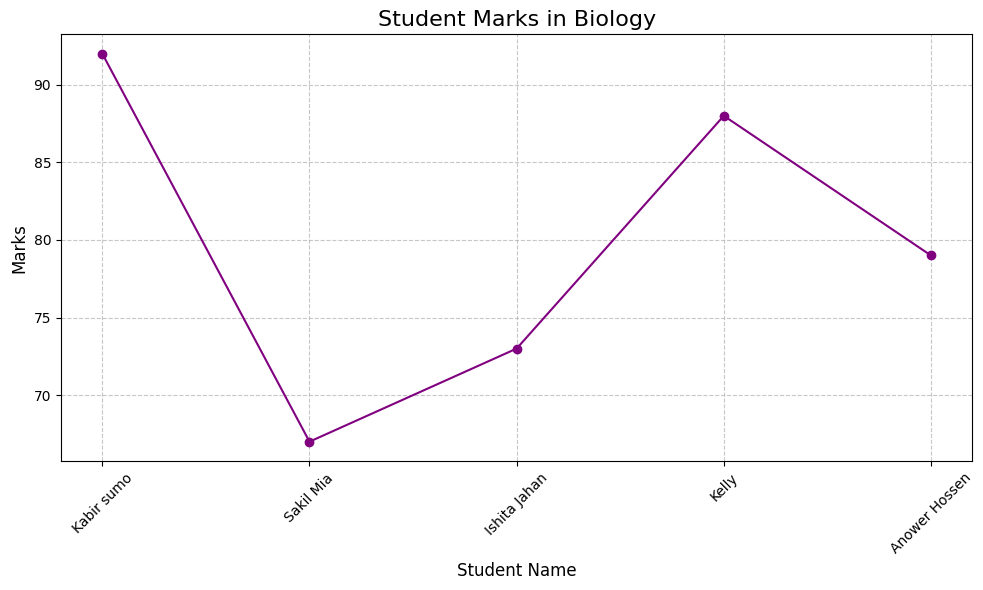


Data Visualization
1. Bar Chart of Average Marks per Subject
2. Pie Chart of Grade Distribution
3. Line Graph of Student Marks in a Chosen Subject
4. Exit
Enter your choice: 4
Exiting Data Visualization.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the existing student data from CSV
def load_data():
    return pd.read_csv('student_data.csv')

# Bar chart: Average Marks per Subject
def plot_average_marks(df):
    average_marks = df.groupby('Subjects (Science)')['Marks'].mean()
    average_marks.plot(kind='bar', color='skyblue', figsize=(8, 6))
    plt.title('Average Marks per Subject', fontsize=16)
    plt.xlabel('Subjects', fontsize=12)
    plt.ylabel('Average Marks', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Pie chart: Grade Distribution
def plot_grade_distribution(df):
    grade_counts = df['Grade'].value_counts()
    grade_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    plt.title('Grade Distribution', fontsize=16)
    plt.ylabel('')  # Remove default y-label
    plt.tight_layout()
    plt.show()

# Line graph: Student Marks in a Chosen Subject
def plot_marks_line(df, subject):
    subject_df = df[df['Subjects (Science)'] == subject]
    plt.figure(figsize=(10, 6))
    plt.plot(subject_df['Name'], subject_df['Marks'], marker='o', color='purple', linestyle='-')
    plt.title(f'Student Marks in {subject}', fontsize=16)
    plt.xlabel('Student Name', fontsize=12)
    plt.ylabel('Marks', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Main function to interact with the user
def main():
    df = load_data()

    while True:
        print("\nData Visualization")
        print("1. Bar Chart of Average Marks per Subject")
        print("2. Pie Chart of Grade Distribution")
        print("3. Line Graph of Student Marks in a Chosen Subject")
        print("4. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            plot_average_marks(df)
        elif choice == '2':
            plot_grade_distribution(df)
        elif choice == '3':
            subject = input("Enter the subject (e.g., Physics, Chemistry, Biology): ")
            if subject in df['Subjects (Science)'].unique():
                plot_marks_line(df, subject)
            else:
                print(f"Subject '{subject}' not found in the dataset.")
        elif choice == '4':
            print("Exiting Data Visualization.")
            break
        else:
            print("Invalid choice, please try again.")

if __name__ == '__main__':
    main()


#6 Searching and Filtering
● Provide options to:
* Search for a student by their ID or name.
* Filter students based on grades (e.g., all students with grade "A").
* Show a list of students who failed in any subject.

In [37]:
import pandas as pd

# Load the existing student data from CSV
def load_data():
    return pd.read_csv('student_data.csv')

# Search for a student by their ID or name
def search_student(df):
    search_type = input("Search by (1) ID or (2) Name? Enter 1 or 2: ")
    if search_type == '1':
        student_id = input("Enter Student ID: ")
        result = df[df['Student ID'] == student_id]
    elif search_type == '2':
        name = input("Enter Student Name: ")
        result = df[df['Name'].str.contains(name, case=False, na=False)]
    else:
        print("Invalid choice.")
        return

    if not result.empty:
        print("\nSearch Result:")
        print(result)
    else:
        print("\nNo student found with the given criteria.")

# Filter students based on grades
def filter_by_grade(df):
    grade = input("Enter the grade to filter (e.g., A, B, C, F): ").upper()
    filtered_students = df[df['Grade'] == grade]

    if not filtered_students.empty:
        print(f"\nStudents with Grade {grade}:")
        print(filtered_students)
    else:
        print(f"\nNo students found with Grade {grade}.")

# Show a list of students who failed in any subject
def list_failed_students(df):
    failed_students = df[df['Marks'] < 50]

    if not failed_students.empty:
        print("\nStudents Who Failed in Any Subject:")
        print(failed_students)
    else:
        print("\nNo students failed in any subject.")

# Main function to interact with the user
def main():
    df = load_data()

    while True:
        print("\nSearching and Filtering")
        print("1. Search for a Student")
        print("2. Filter Students by Grade")
        print("3. List Students Who Failed in Any Subject")
        print("4. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            search_student(df)
        elif choice == '2':
            filter_by_grade(df)
        elif choice == '3':
            list_failed_students(df)
        elif choice == '4':
            print("Exiting Searching and Filtering.")
            break
        else:
            print("Invalid choice, please try again.")

if __name__ == '__main__':
    main()



Searching and Filtering
1. Search for a Student
2. Filter Students by Grade
3. List Students Who Failed in Any Subject
4. Exit
Enter your choice: 2
Enter the grade to filter (e.g., A, B, C, F): A

Students with Grade A:
  Student ID             Name Subjects (Science)  Marks Grade
2       S003       Kabir sumo            Biology     92     A
3       S005         Abid Ali          Chemistry     91     A
6       S008       Hannan Mia          Chemistry     95     A
8       S010  Jarin Khandaker            Physics     90     A

Searching and Filtering
1. Search for a Student
2. Filter Students by Grade
3. List Students Who Failed in Any Subject
4. Exit
Enter your choice: 4
Exiting Searching and Filtering.


#7 Advanced Features (Optional for Bonus Marks)
● File Handling:
* Save updated records to the CSV file after modifications.
* Export filtered data (e.g., only grade "A" students) to a new file.

● Exception Handling:
* Handle invalid inputs like non-numeric marks.
● Regular Expressions (RegEx):
* Validate student ID format (e.g., ST-001).

In [38]:
import pandas as pd
import re

# Load the existing student data from CSV
def load_data():
    return pd.read_csv('student_data.csv')

# Save updated data back to CSV
def save_data(df):
    df.to_csv('student_data.csv', index=False)
    print("Records saved successfully.")

# Export filtered data to a new file
def export_filtered_data(df, grade):
    filtered_df = df[df['Grade'] == grade]
    if not filtered_df.empty:
        filename = f"filtered_students_grade_{grade}.csv"
        filtered_df.to_csv(filename, index=False)
        print(f"Filtered data exported to {filename}.")
    else:
        print(f"No students found with Grade {grade}.")

# Add a new student with ID validation and exception handling for invalid inputs
def add_student(df):
    try:
        student_id = input("Enter Student ID (e.g., ST-001): ")
        if not re.match(r'^ST-\d{3}$', student_id):
            raise ValueError("Invalid Student ID format. It should be like ST-001.")

        name = input("Enter Student Name: ")
        subject = input("Enter Subject (e.g., Physics): ")
        marks = input("Enter Marks (numeric): ")

        if not marks.isdigit() or not (0 <= int(marks) <= 100):
            raise ValueError("Invalid Marks. Marks should be a number between 0 and 100.")

        marks = int(marks)
        grade = calculate_grade(marks)

        # Add the student to the DataFrame
        new_student = {'Student ID': student_id, 'Name': name, 'Subjects (Science)': subject, 'Marks': marks, 'Grade': grade}
        df = df.append(new_student, ignore_index=True)
        save_data(df)
        print("Student added successfully.")
    except ValueError as e:
        print(f"Error: {e}")
    return df

# Grade calculation function
def calculate_grade(marks):
    if marks >= 90:
        return 'A'
    elif marks >= 80:
        return 'B'
    elif marks >= 70:
        return 'C'
    else:
        return 'F'

# Main function to interact with the user
def main():
    df = load_data()

    while True:
        print("\nAdvanced Features")
        print("1. Add a New Student (with validation)")
        print("2. Save Records to File")
        print("3. Export Filtered Data (Grade-based)")
        print("4. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            df = add_student(df)
        elif choice == '2':
            save_data(df)
        elif choice == '3':
            grade = input("Enter grade to export (e.g., A, B, C, F): ").upper()
            export_filtered_data(df, grade)
        elif choice == '4':
            print("Exiting Advanced Features.")
            break
        else:
            print("Invalid choice, please try again.")

if __name__ == '__main__':
    main()



Advanced Features
1. Add a New Student (with validation)
2. Save Records to File
3. Export Filtered Data (Grade-based)
4. Exit
Enter your choice: 3
Enter grade to export (e.g., A, B, C, F): A
Filtered data exported to filtered_students_grade_A.csv.

Advanced Features
1. Add a New Student (with validation)
2. Save Records to File
3. Export Filtered Data (Grade-based)
4. Exit
Enter your choice: 4
Exiting Advanced Features.


#8 User Interaction
● Build a menu-driven program with options such as:
* Add, update, or delete a student record.
* View class performance summary.
* Visualize data (bar chart, pie chart, etc.).
* Search and filter student records.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Save Functions
def load_data():
    return pd.read_csv('student_data.csv')

def save_data(df):
    df.to_csv('student_data.csv', index=False)

# Add a Student Record
def add_student(df):
    student_id = input("Enter Student ID: ")
    name = input("Enter Name: ")
    subject = input("Enter Subject (e.g., Physics, Chemistry, Biology): ")
    marks = int(input("Enter Marks: "))
    grade = calculate_grade(marks)
    new_record = {'Student ID': student_id, 'Name': name, 'Subjects (Science)': subject, 'Marks': marks, 'Grade': grade}
    df = df.append(new_record, ignore_index=True)
    save_data(df)
    print("\nStudent added successfully.")
    return df

# Update a Student Record
def update_student(df):
    student_id = input("Enter Student ID to update: ")
    student = df[df['Student ID'] == student_id]
    if student.empty:
        print("\nNo student found with the given ID.")
    else:
        print("\nCurrent Details:")
        print(student)
        field = input("Enter the field to update (Name/Subjects (Science)/Marks): ")
        if field in ['Name', 'Subjects (Science)', 'Marks']:
            new_value = input(f"Enter new value for {field}: ")
            if field == 'Marks':
                new_value = int(new_value)
                df.loc[df['Student ID'] == student_id, 'Grade'] = calculate_grade(new_value)
            df.loc[df['Student ID'] == student_id, field] = new_value
            save_data(df)
            print("\nStudent record updated successfully.")
        else:
            print("\nInvalid field.")
    return df

# Delete a Student Record
def delete_student(df):
    student_id = input("Enter Student ID to delete: ")
    df = df[df['Student ID'] != student_id]
    save_data(df)
    print("\nStudent record deleted successfully.")
    return df

# Calculate Grades
def calculate_grade(marks):
    if marks >= 90:
        return 'A'
    elif marks >= 80:
        return 'B'
    elif marks >= 70:
        return 'C'
    else:
        return 'F'

# View Class Performance Summary
def class_performance_summary(df):
    average_marks = df.groupby('Subjects (Science)')['Marks'].mean()
    print("\nAverage Marks per Subject:")
    print(average_marks)

    top_scorer = df.loc[df.groupby('Subjects (Science)')['Marks'].idxmax()]
    print("\nTop Scorers:")
    print(top_scorer[['Subjects (Science)', 'Name', 'Marks']])

    failed_students = df[df['Marks'] < 50]
    print(f"\nNumber of Students Who Failed: {len(failed_students)}")

# Visualize Data
def visualize_data(df):
    print("\nData Visualization")
    print("1. Bar Chart of Average Marks per Subject")
    print("2. Pie Chart of Grade Distribution")
    print("3. Line Graph of Marks in a Subject")
    choice = input("Enter your choice: ")

    if choice == '1':
        average_marks = df.groupby('Subjects (Science)')['Marks'].mean()
        average_marks.plot(kind='bar', color='skyblue', figsize=(8, 6))
        plt.title('Average Marks per Subject')
        plt.ylabel('Average Marks')
        plt.xlabel('Subjects')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    elif choice == '2':
        grade_counts = df['Grade'].value_counts()
        grade_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
        plt.title('Grade Distribution')
        plt.ylabel('')
        plt.show()
    elif choice == '3':
        subject = input("Enter subject: ")
        if subject in df['Subjects (Science)'].unique():
            subject_df = df[df['Subjects (Science)'] == subject]
            plt.plot(subject_df['Name'], subject_df['Marks'], marker='o')
            plt.title(f'Student Marks in {subject}')
            plt.xlabel('Students')
            plt.ylabel('Marks')
            plt.grid()
            plt.show()
        else:
            print("Subject not found.")
    else:
        print("Invalid choice.")

# Search and Filter
def search_filter_menu(df):
    print("\nSearch and Filter")
    print("1. Search by Student ID or Name")
    print("2. Filter by Grade")
    print("3. List Failed Students")
    choice = input("Enter your choice: ")

    if choice == '1':
        search_type = input("Search by (1) ID or (2) Name: ")
        if search_type == '1':
            student_id = input("Enter Student ID: ")
            print(df[df['Student ID'] == student_id])
        elif search_type == '2':
            name = input("Enter Student Name: ")
            print(df[df['Name'].str.contains(name, case=False, na=False)])
        else:
            print("Invalid choice.")
    elif choice == '2':
        grade = input("Enter grade (A/B/C/F): ").upper()
        print(df[df['Grade'] == grade])
    elif choice == '3':
        print(df[df['Marks'] < 50])
    else:
        print("Invalid choice.")

# Main Menu
def main():
    df = load_data()

    while True:
        print("\nStudent Record Management System")
        print("1. Add a Student Record")
        print("2. Update a Student Record")
        print("3. Delete a Student Record")
        print("4. View Class Performance Summary")
        print("5. Visualize Data")
        print("6. Search and Filter")
        print("7. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            df = add_student(df)
        elif choice == '2':
            df = update_student(df)
        elif choice == '3':
            df = delete_student(df)
        elif choice == '4':
            class_performance_summary(df)
        elif choice == '5':
            visualize_data(df)
        elif choice == '6':
            search_filter_menu(df)
        elif choice == '7':
            print("Exiting the system. Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == '__main__':
    main()



Student Record Management System
1. Add a Student Record
2. Update a Student Record
3. Delete a Student Record
4. View Class Performance Summary
5. Visualize Data
6. Search and Filter
7. Exit
Enter your choice: 4

Average Marks per Subject:
Subjects (Science)
Biology      79.8
Chemistry    88.0
Physics      85.0
Name: Marks, dtype: float64

Top Scorers:
  Subjects (Science)             Name  Marks
2            Biology       Kabir sumo     92
6          Chemistry       Hannan Mia     95
8            Physics  Jarin Khandaker     90

Number of Students Who Failed: 0

Student Record Management System
1. Add a Student Record
2. Update a Student Record
3. Delete a Student Record
4. View Class Performance Summary
5. Visualize Data
6. Search and Filter
7. Exit
Enter your choice: 7
Exiting the system. Goodbye!
